Using TensorFlow primitives perform the following steps:

- allocate random normal variables for weight and bias representation of a multi-layer perceptron (MLP) with n_input size, two hidden layers with n_hidden_1 and n_hidden_2 neurons respectively and n_output size.

- define a function which takes a tensor as input and returns the MLP prediction. Use the sigmoid function as activation function for all nodes in the network except for the output layer, which should be linear.

- Test the model prediction for 10 values in x linearly spaced from [-1,1] with n_input=1, n_hidden_1=5, n_hidden_2=2, n_output=1.

In [4]:
import tensorflow as tf
import numpy as np

n_input=1# size of input layer
n_hidden_1=5 #size of thefirst hidden layer
n_hidden_2=2 #size 2 h
n_output=1 #size of the output layer


#uso dizionario
weights={

    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])), #input->1 weights
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])), #1->2 weights
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_output])) #2->output weights
        }

biases={
    'b1': tf.Variable(tf.random.normal([n_hidden_1])), #first layer biases( not needed for input)
    'b2': tf.Variable(tf.random.normal([n_hidden_2])), #2 layer bias
    'out': tf.Variable(tf.random.normal([n_output])) #output bias
    }


def MLP(x):
    z1=tf.add(tf.matmul(x, weights['h1']),biases['b1']) #first layer
    a1=tf.nn.sigmoid(z1) #activation
    a2=tf.nn.sigmoid(tf.add(tf.matmul(a1, weights['h2']),biases['b2']))
    output=tf.add(tf.matmul(a2, weights['out']), biases['out']) #is already linear: y=Wa+b
    return output

x=np.linspace(-1,1,10, dtype=np.float32).reshape(-1,1)#turn it into a column vector
y1=MLP(x)
print(y1)
    



tf.Tensor(
[[-1.1278253 ]
 [-1.102113  ]
 [-1.0731877 ]
 [-1.0406445 ]
 [-1.0041112 ]
 [-0.96330917]
 [-0.9181292 ]
 [-0.86870885]
 [-0.8154851 ]
 [-0.75919783]], shape=(10, 1), dtype=float32)


# Exercise 2 - Sequential model
- Translate the previous exercise with TensorFlow/Keras's sequential model.

- Print the model summary to screen.

- Verify that predictions between both models are in agreement.

- Print the weights from the model object.


In [8]:
#create a sequential model keras

model= tf.keras.models.Sequential()
#add layers
model.add(tf.keras.layers.Dense(n_hidden_1, activation='sigmoid', input_dim=1))
model.add(tf.keras.layers.Dense(n_hidden_2, activation='sigmoid'))
model.add(tf.keras.layers.Dense(n_output, activation='linear'))

#set weights and biases
model.set_weights( [weights['h1'], biases['b1'],
                  weights['h2'], biases['b2'],
                  weights['out'], biases['out']])
model.summary()

#print prediction
y2=model.predict(x)
print(y2)
if not np.allclose(y1, y2):
    raise ValueError("results do not match")

#print weigths layer after layer
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()   # lista [W, b]
    print(f"\nLayer {i} - {layer.name}")
    print("W shape:", weights[0].shape)
    print("W values:\n", weights[0])
    print("b shape:", weights[1].shape)
    print("b values:\n", weights[1])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[-1.1278253 ]
 [-1.102113  ]
 [-1.0731877 ]
 [-1.0406445 ]
 [-1.0041112 ]
 [-0.96330917]
 [-0.9181292 ]
 [-0.86870885]
 [-0.8154851 ]
 [-0.75919783]]

Layer 0 - dense
W shape: (1, 5)
W values:
 [[ 1.3644325  -0.5000671  -0.40362906  0.8030586  -0.4079806 ]]
b shape: (5,)
b values:
 [-1.3923291   0.434137    0.76725745 -1.5236708  -0.9531652 ]

Layer 1 - dense_1
W shape: (5, 2)
W values:
 [[-0.01503551 -0.64646065]
 [ 1.1784537   1.2043118 ]
 [ 0.19164094 -0.79186076]
 [-2.1670287  -1.1122205 ]
 [ 0.20374253  0.858689  ]]
b shape: (2,)
b values:
 [ 0.5414798  -0.20769437]

Layer 2 - dense_2
W shape: (2, 1)
W values:
 [[-1.1847227]
 [-0.8207483]]
b shape: (1,)
b values:
 [0.28271863]


# Exercise 3 - Manual training with functional API
### Data generation

- Generate predictions of f(x) = 3 * x + 2 for 200 linearly spaced x points between [-2, 2] in single precision.

- Include random normal noise (mu=0, sigma=1) to all predictions.

- Plot data and ground truth model.

### Linear fit

- Define a custom model using tf.Module inheritance which returns the functional form w * x + b where w and b are tensor variables initialized with random values.

- Define a loss function matching the mean squared error.

- Plot data, ground truth model, predictions and loss function for the untrained model.

### Training loop

- Define a train function which computes the loss function gradient and performs a full batch SGD (manually).

- Define a training_loop function which takes performs 10 epochs, prints the loss function at each iteration to screen and stores the model weights.

### Post-fit

- Print the evolution of weights at each iteration.

- Plot data, ground truth model, predictions and loss function after the training.

Use Keras

Replace the training loop with Keras model API, check results.

loss of untrained model:10.713371276855469
loss at epoch 0=6.635580062866211
loss at epoch 1=4.311358451843262
loss at epoch 2=2.9763078689575195
loss at epoch 3=2.2032620906829834
loss at epoch 4=1.7519608736038208
loss at epoch 5=1.486323356628418
loss at epoch 6=1.3286981582641602
loss at epoch 7=1.2344285249710083
loss at epoch 8=1.177625298500061
loss at epoch 9=1.1431550979614258


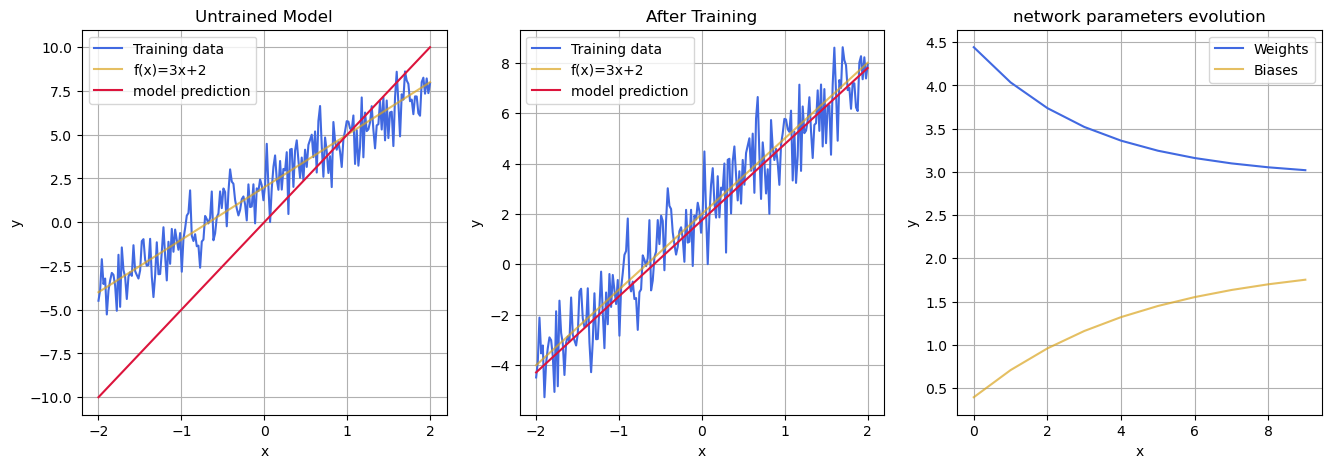

0

In [115]:
import matplotlib.pyplot as plt
def f(x):
    y=3*x+2
    y=tf.cast(y, tf.float32)
    return y

def Generate_data(): 
    x=tf.linspace(-2,2,200) #generate data
    x=tf.cast(x, tf.float32)
    noise=tf.random.normal(shape=x.shape) #generate noise
    noise=tf.cast(noise, tf.float32)
    y=f(x)+noise
    return x,y

class MyModel(tf.Module): #custom model
    #constructor
    def __init__(self, name=None): #istanzia il modello e definisce i parametri
        super().__init__( name=name) #eredita il costruttore del tf.Module, se non metto nomi lascia in bianco
        self.w=tf.Variable(5.0)
        self.b=tf.Variable(0.0)
    #functional form
    def __call__(self, x):
        return x*self.w+self.b

def Loss(y,ytrue):
    #MSE
    return tf.reduce_mean(tf.square(ytrue-y)) #reduce mean fa la media su tutto il tensore



def Train(model, x, y, learning_rate):
    # prepare the differentiator
    with tf.GradientTape() as t:
        #tutto quello che faccio qua dentro rimane tracciato da tf per derivare
        current_loss=Loss(model(x), y)
        #SGD: calcolo i gradienti e aggiorno i parametri in direzione opposta
        dw, db=t.gradient (current_loss, [model.w, model.b]) #dw e db hanno le derivate della loss rispetto ai rispetivi parametri

        #aggiorno.i pesi con assign_sub : esempio: x.assign_sub(1) fa x=x-1
        
        model.w.assign_sub( learning_rate*dw)
        model.b.assign_sub(learning_rate*db) #sgd completato!


def Training_loop(model,x, y, epochs):

    w=[]
    b=[] #store w and b
    for epoch in range (epochs):
        Train(model, x, y, learning_rate=0.1)

        w.append(model.w.numpy())
        b.append(model.b.numpy())

        print(f"loss at epoch {epoch}={Loss(model(x), y)}")

    return w,b
        



def main():
    #print data and ground truth
    x,y=Generate_data()
    y_ground=f(x)
    model=MyModel()
    ypred=model(x)
    print(f"loss of untrained model:{Loss(y,ypred)}")
    fig, ax= plt.subplots(1,3, figsize=(16,5))
    ax[0].plot(x, y, color='royalblue', label='Training data')
    ax[0].plot(x, y_ground, color='goldenrod', alpha=0.7,label='f(x)=3x+2')
    ax[0].plot(x, ypred, color='crimson',label='model prediction')
    ax[0].set_title("Untrained Model")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    ax[0].grid(True)
    ax[0].legend()

    epochs=10
    w, b= Training_loop(model, x, y, epochs)
    ax[1].plot(x, y, color='royalblue', label='Training data')
    ax[1].plot(x, y_ground, color='goldenrod', alpha=0.7,label='f(x)=3x+2')
    ax[1].plot(x, model(x), color='crimson',label='model prediction')
    ax[1].set_title("After Training")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("y")
    ax[1].grid(True)
    ax[1].legend()



    N=np.arange(epochs)
  
    ax[2].plot(N, w, color='royalblue', label='Weights')
    ax[2].plot(N, b, color='goldenrod', alpha=0.7,label='Biases')
    ax[2].set_title("network parameters evolution")
    ax[2].set_xlabel("x")
    ax[2].set_ylabel("y")
    ax[2].grid(True)
    ax[2].legend()
    plt.show()
    
    return 0


main()
    
    


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 10.3899
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.3899
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.3899
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.3899
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.3899
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.3899
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.3899
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.3899
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.3899
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.3899
loss of untrained model:10.389948844909668
loss at epoch 0=6.456610202789307
loss at epoch 1=4.2057013511657715
loss at epoch 2=2.9073541164398193
loss at epoch 3=2.1523444652557373
loss at epoch 4=1.7096754312515259
loss at epoch 5=1.4480077028274536
loss at epoch 6=1.2920933961868286
loss at epoch 7=1.198475956916809
loss at epoch 8=1.1418533325

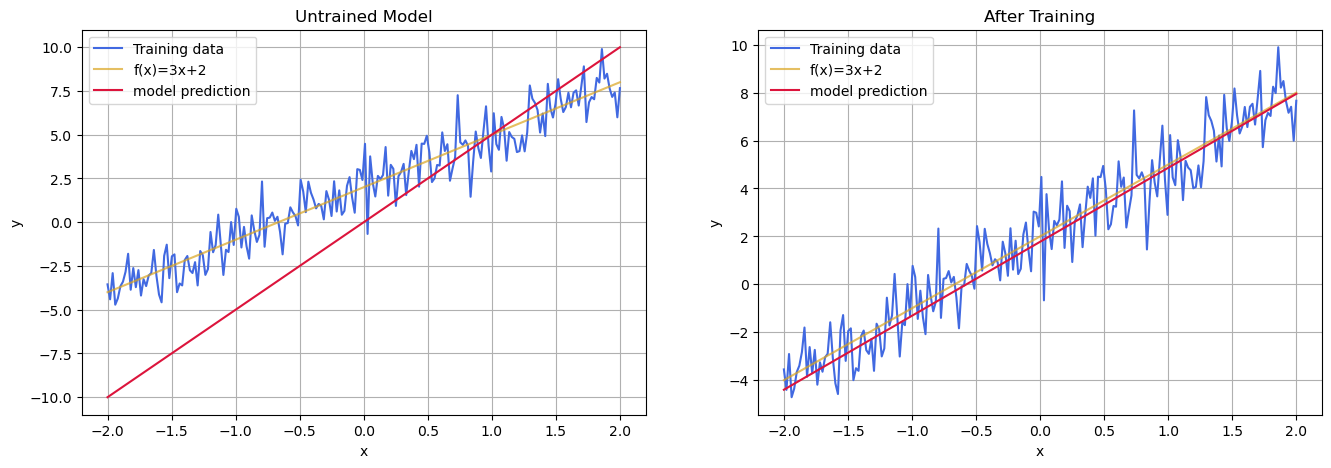

In [135]:
#same but with keras model

class MyKerasModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__( **kwargs)
        self.w=tf.Variable(5.0)
        self.b=tf.Variable(0.0)
    def __call__(self, x):
         return x*self.w+self.b



def main():
    #print data and ground truth
    x,y=Generate_data()
    y_ground=f(x)
    model=MyKerasModel()#con keras tutte le funzioni non servono, fa tutto compile
    ypred=model(x) #untrained

    #train
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse') #in compile specifico ottimizzatore e loss da usare
    #con fit eseguo il training vero e proprio
    model.fit(x,y, epochs=10, batch_size=len(x))
    
    print(f"loss of untrained model:{Loss(y,ypred)}")
    fig, ax= plt.subplots(1,2, figsize=(16,5))
    ax[0].plot(x, y, color='royalblue', label='Training data')
    ax[0].plot(x, y_ground, color='goldenrod', alpha=0.7,label='f(x)=3x+2')
    ax[0].plot(x, ypred, color='crimson',label='model prediction')
    ax[0].set_title("Untrained Model")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    ax[0].grid(True)
    ax[0].legend()

    epochs=10
    w, b= Training_loop(model, x, y, epochs)
    ax[1].plot(x, y, color='royalblue', label='Training data')
    ax[1].plot(x, y_ground, color='goldenrod', alpha=0.7,label='f(x)=3x+2')
    ax[1].plot(x, model(x), color='crimson',label='model prediction')
    ax[1].set_title("After Training")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("y")
    ax[1].grid(True)
    ax[1].legend()
    plt.show()

main()
        